<a href="https://colab.research.google.com/github/imyoungchae/Algorithm_study/blob/main/algorithm_study_Day14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 해시 테이블
- 이진탐색트리의 성능을 개선한 AVL트리와 레드블랙트리의 삽입과 삭제 연산의 수행시간은 각각 O(log N), 해시테이블은 각각의 Key값이 해시함수에 의해 고유한 index를 가지게 되어 바로 접근할 수 있으므로 평균적으로 O(1)이나, O(N)까지 증가할 수 있다
- *해시* : 키를 간단한 함수를 사용해 변환한 값을 배열에 인덱스로 이용하여 항목을 저장하는 것
- *해시함수* : 해시테이블의 키 값으로 레코드가 저장되어 있는 주소(혹은 색인)를 산출하는 함수
- *해시값 또는 해시주소* : 해시함수가 계산한 값
- *해시테이블* : 항목이 해시값에 따라 저장되는 배열
- 서로 다른 키들이 동일한 해시값을 가질 때 충돌 발생
- 참고로 딕셔너리는 해싱기법을 이용함

**나눗셈함수(=>가장 널리 사용되는 해시함수)**

나눗셈함수는 키를 소수 M으로 나눈 뒤 그 나머지를 해시값으로 사용

즉, h(key) = key % M 이고 해시테이블의 인덱스는 0에서 M-1이 된다

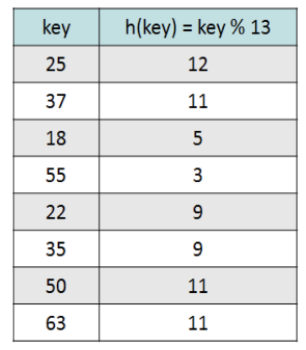

##개방주소방식
:해시테이블 전체를 열린공간으로 가정하고 충돌된 키를 일정한 방식에 따라서 찾아낸 empty 원소에 저장

**대표적인 개방주소방식**

**1. 선형조사**

- 충돌이 일어난 원소에서부터 순차적으로 검색하여 처음 발견한 empty원소에 충돌이 일어난 키를 저장(=바로 다음의 비어있는 셀에 저장함으로써 충돌을 처리)
- A[ (h(k) + f(i)) % M ],f(i)=i,i=0,1,2,,, 순서로 버켓을 조사
- 해시테이블은 1차원 리스트이므로, i+j가 M이 되면 a[0]을 검색
- 검사되는 각 테이블 셀은 조사(probe)라고 불린다
- h(k) = k % M



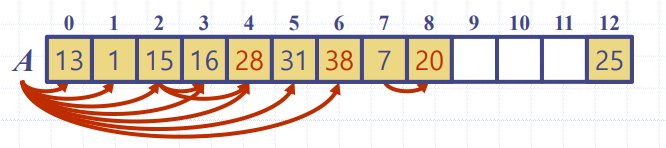

파일명: linear_prob.py

In [ ]:
class LinearProbing:
    def __init__(self,size):
        self.M = size
        self.a = [None for x in range(size+1)] # 해시테이블
        self.d = [None for x in range(size+1)] # key 관련 데이터 저장

    def hash(self,key):
        return key % self.M # 나눗셈 함수

    def put(self,key,data): # 삽입 연산
        initial_position = self.hash(key) # 초기 위치
        i = initial_position
        j=0
        while True:
            if self.a[i] == None or self.a[i] == '$': # 삽입 위치 발견
                self.a[i] = key # key를 해시 테이블에 저장
                self.d[i] = data # key 관련 데이터 저장
                return
            if self.a[i] == key: # 이미 key 존재한다면
                self.d[i] = data # 데이터만 갱신
                return
            j += 1
            i = (initial_position + j) % self.M # i의 다음 위치
            if i == initial_position:
                break

    def get(self,key): # 탐색 연산
        initial_position = self.hash(key)
        i = initial_position
        j = 1
        while self.a[i] != None: # a[i]가 empty가 아니라면
            if self.a[i] == key:
                return self.d[i]
            i = (initial_position + j) % self.M
            j += 1
            if i == initial_position: # i가 초기위치와 같으면 루프 종료
                return None # 탐색 실패
        return None # 탐색 실패

    def delete(self,key): # 삭제 연산
        initial_position = self.hash(key)
        i = initial_position
        j = 1
        while self.a[i] != None: # a[i]가 empty가 아니면
            if self.a[i] == key:
                self.a[i] == '$'
                self.d[i] = None
            i = (initial_position + j) % self.M
            j += 1
            if i == initial_position:
                 return None # 삭제 실패
        return None # 삭제 실패
                

    def print_table(self):
        for i in range(self.M):
            print('{:4}'.format(str(i)),'',end='')
        print()
        for i in range(self.M):
            print('{:4}'.format(str(self.a[i])),'',end='')
        print()

if __name__ == '__main__':
    t = LinearProbing(13)
    t.put(25,'grape')
    t.put(37,'apple')
    t.put(18,'banana')
    t.put(55,'cherry')
    t.put(22,'mango')
    t.put(35,'lime')
    t.put(50,'orange')
    t.put(63,'watermelon')
    print('탐색 결과: ')
    print('50의 data = ',t.get(50))
    print('63의 data = ',t.get(63))
    print('해시 테이블: ')
    t.print_table()
    t.delete(50)
    t.print_table()
    print('63의 data = ',t.get(63))
    t.put(9,'berry')
    t.print_table()


탐색 결과: 
50의 data =  orange
63의 data =  watermelon
해시 테이블: 
0    1    2    3    4    5    6    7    8    9    10   11   12   
50   63   None 55   None 18   None None None 22   35   37   25   
0    1    2    3    4    5    6    7    8    9    10   11   12   
50   63   None 55   None 18   None None None 22   35   37   25   
63의 data =  watermelon
0    1    2    3    4    5    6    7    8    9    10   11   12   
50   63   9    55   None 18   None None None 22   35   37   25   


**2. 이차조사**
- 선형조사와 근본적으로 동일한 충돌해결 방법
- A[(h(k) + f(i)%M ],f(i)=i^2,i=0,1,2,,, 순서로 버켓을 조사
- 충돌 후 배열 a에서 (h(key) + j^2)%M,j=0,1,2,3,,,) 으로 선형조사보다 더 멀리 떨어진 곳에서 empty 원소를 찾음
- 해시 값이 동일한 키들은 동일한 조사를 수반
- M이 소수가 아니거나 버켓 배열이 반 이상 차면, 비어있는 버켓이 남아 있더라도 찾지 못할 수 있다
- h(k) = k % M, f(i) = i^2

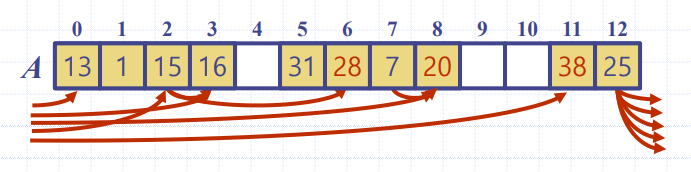

파일명: quad_prob.py

In [ ]:
class QuadProbing:
    def __init__(self,size):
        self.M = size
        self.a = [None for x in range(size + 1)]
        self.d = [None for x in range(size + 1)] # key 관련 데이터 저장
        self.N = 0 # 항목 수

    def hash(self,key):
        return key % self.M # 나눗셈 함수

    def put(self,key,data): # 삽입 연산
        initial_position = self.hash(key) # 초기 위치
        i = initial_position
        j=0
        while True:
            if self.a[i] == None: # 삽입 위치 발견
                self.a[i] = key # key를 해시 테이블에 저장
                self.d[i] = data # key 관련 데이터 저장
                return
            if self.a[i] == key: # 이미 key 존재한다면
                self.d[i] = data # 데이터만 갱신
                return
            j += 1
            i = (initial_position + j*j) % self.M # i의 다음 위치
            if self.N > self.M: # 테이블이 full이면
                break
            
    def get(self,key): # 탐색 연산
        initial_position = self.hash(key)
        i = initial_position
        j = 1
        while self.a[i] != None: # a[i]가 empty가 아니라면
            if self.a[i] == key:
                return self.d[i]
            i = (initial_position + j*j) % self.M
            j += 1
            if i == initial_position: # i가 초기위치와 같으면 루프 종료
                return None # 탐색 실패

    def print_table(self):
        for i in range(self.M):
            print('{:4}'.format(str(i)),'',end='')
        print()
        for i in range(self.M):
            print('{:4}'.format(str(self.a[i])),'',end='')
        print()
if __name__ == '__main__':
    t = QuadProbing(13)
    t.put(25,'grape')
    t.put(37,'apple')
    t.put(18,'banana')
    t.put(55,'cherry')
    t.put(22,'mango')
    t.put(35,'lime')
    t.put(50,'orange')
    t.put(63,'watermelon')
    print('탐색 결과: ')
    print('50의 data = ',t.get(50))
    print('63의 data = ',t.get(63))
    print('해시 테이블: ')
    t.print_table()
    t.print_table()
    print()
    print('63의 data = ',t.get(63))
    t.put(9,'berry')
    t.print_table()




탐색 결과: 
50의 data =  orange
63의 data =  watermelon
해시 테이블: 
0    1    2    3    4    5    6    7    8    9    10   11   12   
None None 50   55   None 18   None 63   None 22   35   37   25   
0    1    2    3    4    5    6    7    8    9    10   11   12   
None None 50   55   None 18   None 63   None 22   35   37   25   

63의 data =  watermelon
0    1    2    3    4    5    6    7    8    9    10   11   12   
9    None 50   55   None 18   None 63   None 22   35   37   25   


In [ ]:
import random
class RandProbing:
    def __init__(self,size):
        self.M = size
        self.a = [None for x in range(size + 1)]
        self.d = [None for x in range(size + 1)] # key 관련 데이터 저장
        self.N = 0 # 항목 수

    def hash(self,key):
        return key % self.M # 나눗셈 함수

    def put(self,key,data): # 삽입 연산
        initial_position = self.hash(key) # 초기 위치
        i = initial_position
        random.seed(1000)
        while True:
            if self.a[i] == None: # 삽입 위치 발견
                self.a[i] = key # key를 해시 테이블에 저장
                self.d[i] = data # key 관련 데이터 저장
                self.N += 1
                return
            if self.a[i] == key: # 이미 key 존재한다면
                self.d[i] = data # 데이터만 갱신
                return
            j = random.randint(1,99)
            i = (initial_position + j) % self.M # i의 다음 위치
            if self.N > self.M: # 테이블이 full이면
                break
    def get(self,key): # 탐색 연산
        initial_position = self.hash(key)
        i = initial_position
        random.seed(1000)
        while self.a[i] != None: # a[i]가 empty가 아니라면
            if self.a[i] == key:
                return self.d[i] # 탐색 성공
            i = (initial_position + random.randint(1,99)) % self.M
        return None # 탐색 실패
    
    def print_table(self):
        for i in range(self.M):
            print('{:4}'.format(str(i)),'',end='')
        print()
        for i in range(self.M):
            print('{:4}'.format(str(self.a[i])),'',end='')

if __name__ == '__main__':
    t = RandProbing(13)
    t.put(25,'grape')
    t.put(37,'apple')
    t.put(18,'banana')
    t.put(55,'cherry')
    t.put(22,'mango')
    t.put(35,'lime')
    t.put(50,'orange')
    t.put(63,'watermelon')
    print('탐색 결과: ')
    print('50의 data = ',t.get(50))
    print('63의 data = ',t.get(63))
    print('해시 테이블: ')
    t.print_table()
    t.print_table()
    print()
    print('63의 data = ',t.get(63))
    t.put(9,'berry')
    t.print_table()

탐색 결과: 
50의 data =  orange
63의 data =  watermelon
해시 테이블: 
0    1    2    3    4    5    6    7    8    9    10   11   12   
None 50   None 55   35   18   63   None None 22   None 37   25   0    1    2    3    4    5    6    7    8    9    10   11   12   
None 50   None 55   35   18   63   None None 22   None 37   25   
63의 data =  watermelon
0    1    2    3    4    5    6    7    8    9    10   11   12   
None 50   None 55   35   18   63   None 9    22   None 37   25   